In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import csv

In [21]:
fractal_data = pd.DataFrame(pd.read_csv("data/100-fractals.csv", dtype=np.float64))


endNum = 100

# want to seperate data into seperate runs
chunk_size = endNum

#object to store data
runs = []

#seperates data from csv into individual objects
for i in range(0, len(fractal_data), chunk_size):
    run = fractal_data.iloc[i:i+chunk_size]
    runs.append(run)


In [22]:
#create line of best fits to calculate gradient

def best_fit(x, slope , intercept):
    return slope*x + intercept


/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_22174/655962952.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


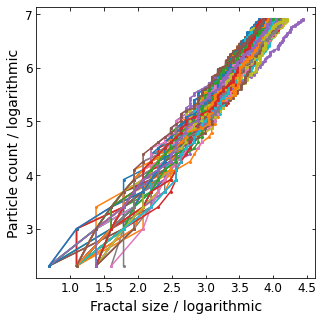

In [27]:
#plotting

fig, ax = plt.subplots(figsize=(5,5))  

#colours for figure
colors = ["red", "orange", "black", "green", "blue", "indigo", "violet", "cyan", "magenta", "purple"]


fractal_dim = []
   
      
for i in range(0, len(runs)):
               #len(runs)):
    temp = pd.DataFrame(runs[i])
    
    #creating log of data
    temp['ln_numParticles'] = np.log(temp['numParticles'])
    temp['ln_clusterSize'] = np.log(temp['clusterRadius'])
    
    #calculating fractal dimension
    popt, pcov = curve_fit(best_fit, temp['ln_clusterSize'], temp['ln_numParticles'])
    m = popt[0]    
    fractal_dim.append(m)
    
    #graph formatting
    ax.set_xlabel("Fractal size / logarithmic", fontsize=14)
    ax.set_ylabel("Particle count / logarithmic", fontsize=14)
    plt.xticks(fontsize=12)                 
    plt.yticks(fontsize=12) 
    plt.tick_params(axis='both', which='both', direction='in', top=True, right=True) 
    
    #plots graph
    ax.plot(temp['ln_clusterSize'], temp['ln_numParticles'],  ls='-', marker='o', markersize='2')
            #color=colors[i], markersize='2')

#saving fractal dimension to csv file
fractal_dim_data = 'data/fractal_dim.csv'
with open(fractal_dim_data, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["fractal_dim"])
    writer.writerows(map(lambda x: [x], fractal_dim))

fig.show()
fig.savefig('figures/figure1.png')

    

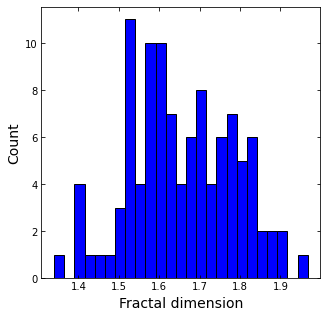

In [33]:
#plot logarithm of fractal dimensions

plt.figure(figsize=(5,5))

plt.hist(fractal_dim, bins=25, color='blue', edgecolor='black')
plt.xlabel("Fractal dimension", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True) 

plt.show()